In [163]:
import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# rdir = "results-wd.5e-3/"
# rdir="results-wd.1e-4"
# rdir="results --wd 5e-3 --reg_multiscale"
# rdir="results --wd 5e-3"
# rdir="results --batch_size 32 --n_grid 25 --reg_multiscale --no_fit_ratio_scale"
rdir="results --n_grid 25 --reg_multiscale"
datasets = [d for d in os.listdir(f"../{rdir}") if not d.startswith(".")]

results = []
curves = []
for dset in datasets:
    dirs =  [d for d in os.listdir(f"../{rdir}/{dset}") if not d.startswith(".")]

    for dir in dirs:
        runs = [d for d in os.listdir(f"../{rdir}/{dset}/{dir}") if not d.startswith(".")] 
        for seed in runs:
            exp_dir = f"../{rdir}/{dset}/{dir}/{seed}"
            with open(f"{exp_dir}/metrics.yaml", 'r') as io:
                metrics = yaml.safe_load(io)

            with open(f"{exp_dir}/config.yaml", 'r') as io:
                cfg = yaml.safe_load(io)
            metrics['seed'] = int(seed)
            metrics['combo'] = int(cfg['combo_reg'])
            metrics['var'] = "Yes" if int(cfg['var_reg']) else "No"
            metrics['ratio'] = "Yes" if int(cfg['ratio_reg']) else "No"
            metrics['dataset'] = dset
            metrics['dir'] = dir
            results.append(metrics)

            curve = pd.read_csv(f"{exp_dir}/curve.csv")
            curve['seed'] = int(seed)
            curve['var'] = int(cfg['var_reg'])
            curve['ratio'] = int(cfg['ratio_reg'])
            curve['dataset'] = dset
            curve['dir'] = dir
            curves.append(curve)

results = pd.DataFrame(results)
curves = pd.concat(curves)

In [165]:
results.groupby(['dataset', 'dir']).mean().reset_index()

,dataset,dir,@0.1,@0.5,curve,density_negll,last_saved_epoch,ratio_reg_loss,seed,total_loss,var_reg_loss,combo,pos_reg_loss
0,ihdp-N,var_0-ratio_0-pos_0-dout_0.0-erm_1,0.094796,0.180538,0.192820,2.858877,4999.0,NaN,11.5,2.858877,NaN,0.0,NaN
1,ihdp-N,var_0-ratio_0-pos_0-dout_0.25-erm_1,0.092721,0.178403,0.189211,2.861459,4999.0,NaN,11.5,2.861459,NaN,0.0,NaN
2,ihdp-N,var_0-ratio_0-pos_1-dout_0.25-erm_1,0.086118,0.175841,0.181507,2.864766,4999.0,NaN,11.5,2.889448,NaN,0.0,0.024682
3,ihdp-N,var_0-ratio_1-pos_0-dout_0.0-erm_1,0.102674,0.185998,0.197094,2.854901,4999.0,0.200770,11.5,3.055672,NaN,0.0,NaN
4,ihdp-N,var_0-ratio_1-pos_0-dout_0.25-erm_1,0.100793,0.183680,0.193511,2.857543,4999.0,0.201088,11.5,3.058631,NaN,0.0,NaN
5,ihdp-N,var_1-ratio_0-pos_0-dout_0.0-erm_1,0.117069,0.191087,0.211904,2.847823,4999.0,NaN,11.5,3.239025,0.391201,0.0,NaN
6,ihdp-N,var_1-ratio_1-pos_0-dout_0.0-erm_1,0.118551,0.191568,0.211674,2.846597,4999.0,0.200515,11.5,3.426142,0.379029,1.0,NaN
7,ihdp-N,var_1-ratio_1-pos_1-dout_0.25-erm_1,0.095098,0.187748,0.198751,2.852951,4999.0,0.201332,11.5,3.460692,0.380684,1.0,0.025726
8,news-N,var_0-ratio_0-pos_0-dout_0.0-erm_1,0.056664,0.027531,0.042733,3.111095,4999.0,NaN,11.5,3.111095,NaN,0.0,NaN
9,news-N,var_0-ratio_0-pos_0-dout_0.25-erm_1,0.056179,0.027472,0.042452,3.111543,4999.0,NaN,11.5,3.111543,NaN,0.0,NaN


In [166]:
results.groupby(['dataset', 'dir']).std().reset_index()

,dataset,dir,@0.1,@0.5,curve,density_negll,last_saved_epoch,ratio_reg_loss,seed,total_loss,var_reg_loss,combo,pos_reg_loss
0,ihdp-N,var_0-ratio_0-pos_0-dout_0.0-erm_1,0.072198,0.118292,0.097944,0.025375,0.0,NaN,7.071068,0.025375,NaN,0.0,NaN
1,ihdp-N,var_0-ratio_0-pos_0-dout_0.25-erm_1,0.072724,0.116355,0.096368,0.025526,0.0,NaN,7.071068,0.025526,NaN,0.0,NaN
2,ihdp-N,var_0-ratio_0-pos_1-dout_0.25-erm_1,0.072489,0.109897,0.092331,0.024487,0.0,NaN,7.071068,0.023570,NaN,0.0,0.001271
3,ihdp-N,var_0-ratio_1-pos_0-dout_0.0-erm_1,0.072286,0.121944,0.104151,0.024727,0.0,0.001693,7.071068,0.025840,NaN,0.0,NaN
4,ihdp-N,var_0-ratio_1-pos_0-dout_0.25-erm_1,0.072198,0.119431,0.101750,0.024218,0.0,0.001931,7.071068,0.025630,NaN,0.0,NaN
5,ihdp-N,var_1-ratio_0-pos_0-dout_0.0-erm_1,0.079644,0.145828,0.118008,0.023147,0.0,NaN,7.071068,0.049323,0.042109,0.0,NaN
6,ihdp-N,var_1-ratio_1-pos_0-dout_0.0-erm_1,0.080616,0.146825,0.120292,0.022959,0.0,0.001631,7.071068,0.041580,0.038707,0.0,NaN
7,ihdp-N,var_1-ratio_1-pos_1-dout_0.25-erm_1,0.067918,0.123301,0.113697,0.021774,0.0,0.001274,7.071068,0.056883,0.044510,0.0,0.000905
8,news-N,var_0-ratio_0-pos_0-dout_0.0-erm_1,0.047108,0.013270,0.014019,0.010524,0.0,NaN,7.071068,0.010524,NaN,0.0,NaN
9,news-N,var_0-ratio_0-pos_0-dout_0.25-erm_1,0.046588,0.013240,0.013766,0.010422,0.0,NaN,7.071068,0.010422,NaN,0.0,NaN


Plot curves

In [167]:
# curves_means = curves.groupby(['dataset', 'var', 'ratio', 'delta']).mean().reset_index().set_index(['dataset', 'var', 'ratio'])
# curves_stdevs = curves.groupby(['dataset', 'var', 'ratio', 'delta']).std().reset_index().set_index(['dataset', 'var', 'ratio'])
# # D_var0_ratio0 = curves[curves.combo == 0]
# curves_means

========== ihdp-N =========


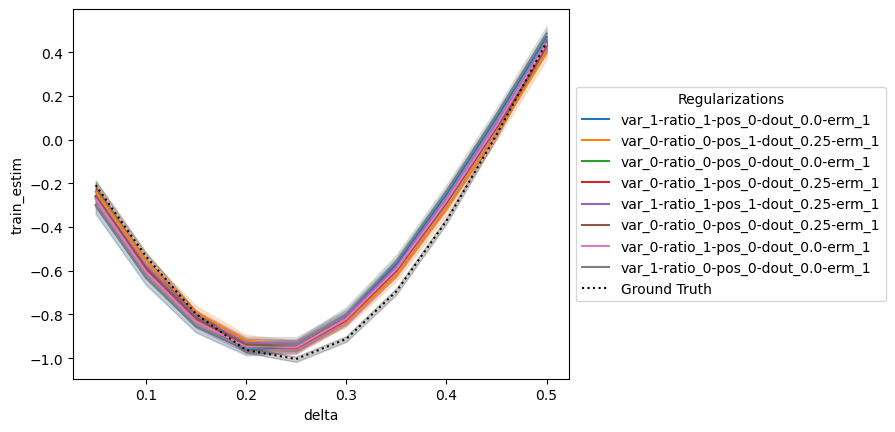

========== sim-N =========


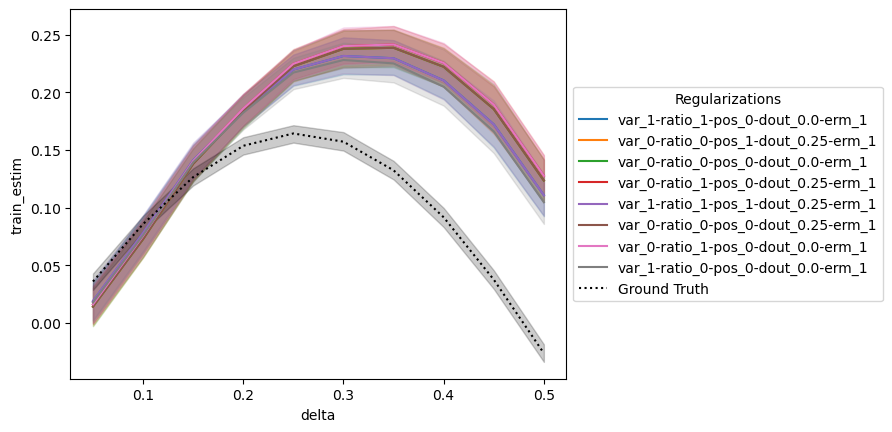

========== news-N =========


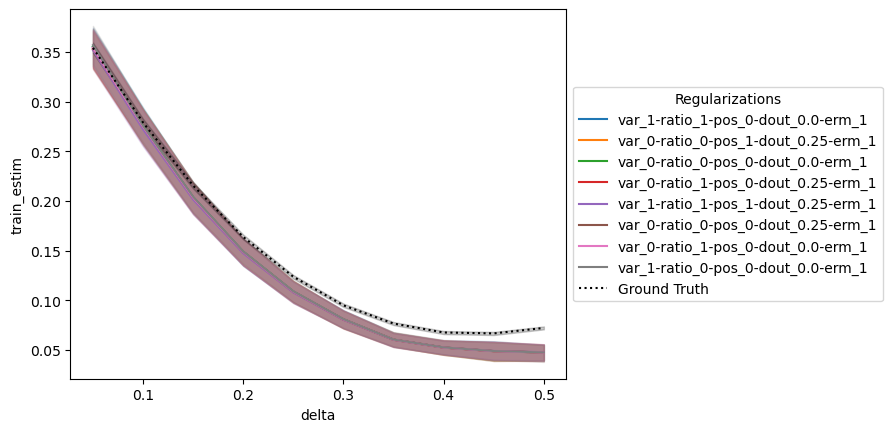

In [168]:
for dset in datasets:
    print(f"========== {dset} =========")
    part = "test"
    D = curves[curves.dataset == dset]
    truth = D[(D.var == 0) & (D.ratio == 0)][["delta", f"{part}_truth"]]
    sns.lineplot(x="delta", y="train_estim", hue="dir", data=D, legend=True)
    sns.lineplot(x="delta", y=f"{part}_truth", label="Ground Truth", c="black", ls=":", data=D, legend=True)
    plt.legend(title='Regularizations', loc='center left', bbox_to_anchor=(1, 0.5))
   
    plt.show()